In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import SimpleITK as sitk
from tqdm import tqdm
import csv
import math

## Save numpy file

In [2]:
def save_npy(data, fname):
    with open(os.getcwd() + f"/../data2/{fname}.npy", 'wb') as f:
        np.save(f, data)

## Data Loading

In [3]:
DD = "/media/hwixley/data-drive/stoic2021/data/mha/"

In [4]:
files = os.listdir(DD)
num_files = len(files)
print(num_files)

2000


# Parse Labels

In [11]:
labels = np.zeros((num_files, 3))

In [12]:
labels.shape

(2000, 3)

In [13]:
with open(DD + '../../metadata/reference.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    
    for i, row in enumerate(spamreader):
        if i > 0:
            labels[i-1,:] = row[0].split(",")

In [14]:
labels

array([[8.6220e+03, 1.0000e+00, 0.0000e+00],
       [1.0720e+03, 1.0000e+00, 0.0000e+00],
       [1.0456e+04, 1.0000e+00, 0.0000e+00],
       ...,
       [8.3900e+02, 0.0000e+00, 0.0000e+00],
       [1.0300e+04, 0.0000e+00, 0.0000e+00],
       [9.6760e+03, 1.0000e+00, 0.0000e+00]])

In [92]:
with open(os.getcwd() + "/../data/labels.npy", 'wb') as f:
    np.save(f, labels)

In [93]:
labels[0,:]

array([8.622e+03, 1.000e+00, 0.000e+00])

In [94]:
labels

array([[8.6220e+03, 1.0000e+00, 0.0000e+00],
       [1.0720e+03, 1.0000e+00, 0.0000e+00],
       [1.0456e+04, 1.0000e+00, 0.0000e+00],
       ...,
       [8.3900e+02, 0.0000e+00, 0.0000e+00],
       [1.0300e+04, 0.0000e+00, 0.0000e+00],
       [9.6760e+03, 1.0000e+00, 0.0000e+00]])

# Slicing CT scans

In [10]:
import math

In [64]:
#sl_thickness = 2

for i in tqdm(range(labels.shape[0])):
    label = labels[i,:]
    print(label[0])
    inputImage = sitk.ReadImage(DD + str(int(label[0])) + ".mha")
    
    ct_image = np.zeros((inputImage.GetDepth(),512,512))
    for d in tqdm(range(inputImage.GetDepth())):
        for row in range(512):
            ct_image[d,row,:] = [inputImage.GetPixel([row,col,d]) for col in range(512)]
              
    save_npy(ct_image, f"npy-images/{str(int(label[0]))}")

  0%|                                                                    | 0/2000 [00:00<?, ?it/s]

8622.0



 42%|████████████████████████▉                                  | 159/376 [00:45<01:01,  3.50it/s]


 85%|██████████████████████████████████████████████████         | 319/376 [01:31<00:16,  3.50it/s]


  0%|                                                        | 1/2000 [01:48<60:26:49, 108.86s/it]

1072.0



 25%|██████████████▊                                            | 159/632 [00:45<02:15,  3.48it/s]


 50%|█████████████████████████████▊                             | 319/632 [01:32<01:30,  3.47it/s]


 76%|████████████████████████████████████████████▋              | 479/632 [02:18<00:44,  3.47it/s]


  0%|                                                        | 2/2000 [04:53<85:03:15, 153.25s/it]

10456.0



 33%|███████████████████▍                                       | 159/484 [00:45<01:33,  3.48it/s]


 66%|██████████████████████████████████████▉                    | 319/484 [01:32<00:47,  3.48it/s]


 99%|██████████████████████████████████████████████████████████▍| 479/484 [02:18<00:01,  3.47it/s]


  0%|                                                        | 3/2000 [07:14<81:56:35, 147.72s/it]

2063.0



 24%|█████████████▉                                             | 159/671 [00:45<02:26,  3.49it/s]


 48%|████████████████████████████                               | 319/671 [01:31<01:40,  3.49it/s]


 71%|██████████████████████████████████████████                 | 479/671 [02:17<00:55,  3.46it/s]


 95%|████████████████████████████████████████████████████████▏  | 639/671 [03:03<00:09,  3.41it/s]


  0%|                                                        | 4/2000 [10:28<92:06:32, 166.13s/it]

9448.0



 72%|██████████████████████████████████████████▋                | 159/220 [00:45<00:17,  3.49it/s]


  0%|▏                                                       | 5/2000 [11:32<71:37:14, 129.24s/it]

7310.0



 38%|██████████████████████▏                                    | 159/422 [00:45<01:15,  3.50it/s]


 76%|████████████████████████████████████████████▌              | 319/422 [01:31<00:29,  3.48it/s]


  0%|▏                                                       | 6/2000 [13:34<70:12:05, 126.74s/it]

3098.0



 51%|█████████████████████████████▉                             | 159/313 [00:45<00:44,  3.46it/s]


  0%|▏                                                       | 7/2000 [15:05<63:39:53, 115.00s/it]

1173.0



 28%|████████████████▌                                          | 159/568 [00:45<01:57,  3.49it/s]


 56%|█████████████████████████████████▏                         | 319/568 [01:31<01:11,  3.49it/s]


 84%|█████████████████████████████████████████████████▊         | 479/568 [02:17<00:25,  3.50it/s]


  0%|▏                                                       | 8/2000 [17:49<72:15:45, 130.60s/it]

771.0



 21%|████████████▍                                              | 159/757 [00:45<02:53,  3.45it/s]


 42%|████████████████████████▊                                  | 319/757 [01:32<02:06,  3.45it/s]


 63%|█████████████████████████████████████▎                     | 479/757 [02:18<01:20,  3.47it/s]


 84%|█████████████████████████████████████████████████▊         | 639/757 [03:04<00:34,  3.47it/s]


  0%|▎                                                       | 9/2000 [21:30<87:49:44, 158.81s/it]

5647.0



 37%|█████████████████████▊                                     | 159/429 [00:45<01:17,  3.50it/s]


 74%|███████████████████████████████████████████▊               | 319/429 [01:31<00:31,  3.49it/s]


  0%|▎                                                      | 10/2000 [23:34<81:54:52, 148.19s/it]

2213.0



 58%|██████████████████████████████████▎                        | 159/273 [00:45<00:32,  3.50it/s]


  1%|▎                                                      | 11/2000 [24:53<70:08:59, 126.97s/it]

4871.0



 44%|█████████████████████████▊                                 | 159/363 [00:45<00:58,  3.49it/s]


 88%|███████████████████████████████████████████████████▊       | 319/363 [01:31<00:12,  3.49it/s]


  1%|▎                                                      | 12/2000 [26:38<66:27:47, 120.36s/it]

10175.0



 29%|████████████████▉                                          | 159/552 [00:45<01:52,  3.49it/s]


 58%|██████████████████████████████████                         | 319/552 [01:31<01:06,  3.50it/s]


 87%|███████████████████████████████████████████████████▏       | 479/552 [02:17<00:20,  3.50it/s]


  1%|▎                                                      | 13/2000 [29:17<72:57:04, 132.17s/it]

10502.0



 40%|███████████████████████▍                                   | 159/401 [00:45<01:09,  3.49it/s]


 80%|██████████████████████████████████████████████▉            | 319/401 [01:31<00:23,  3.50it/s]


  1%|▍                                                      | 14/2000 [31:13<70:12:49, 127.28s/it]

68.0



 45%|██████████████████████████▎                                | 159/357 [00:45<00:56,  3.50it/s]


 89%|████████████████████████████████████████████████████▋      | 319/357 [01:31<00:10,  3.49it/s]


  1%|▍                                                      | 15/2000 [32:57<66:10:41, 120.02s/it]

7117.0



 26%|███████████████▌                                           | 159/601 [00:46<02:10,  3.40it/s]


 53%|███████████████████████████████▎                           | 319/601 [01:32<01:21,  3.44it/s]


 80%|███████████████████████████████████████████████            | 479/601 [02:18<00:35,  3.47it/s]


  1%|▍                                                      | 16/2000 [35:52<75:18:27, 136.65s/it]

8416.0



  1%|▍                                                      | 17/2000 [36:33<59:23:04, 107.81s/it]

6804.0



 33%|███████████████████▎                                       | 159/485 [00:45<01:35,  3.41it/s]


 66%|██████████████████████████████████████▊                    | 319/485 [01:31<00:47,  3.48it/s]


 99%|██████████████████████████████████████████████████████████▎| 479/485 [02:17<00:01,  3.49it/s]


  1%|▍                                                      | 18/2000 [38:53<64:43:22, 117.56s/it]

7802.0



 35%|████████████████████▋                                      | 159/453 [00:45<01:24,  3.50it/s]


 70%|█████████████████████████████████████████▌                 | 319/453 [01:31<00:38,  3.48it/s]


  1%|▌                                                      | 19/2000 [41:03<66:50:51, 121.48s/it]

842.0



 40%|███████████████████████▍                                   | 159/400 [00:46<01:09,  3.47it/s]


 80%|███████████████████████████████████████████████            | 319/400 [01:32<00:23,  3.48it/s]


  1%|▌                                                      | 20/2000 [43:00<66:04:47, 120.15s/it]

5397.0



 65%|██████████████████████████████████████▏                    | 159/246 [00:46<00:25,  3.47it/s]


  1%|▌                                                      | 21/2000 [44:12<58:04:51, 105.66s/it]

5725.0



  1%|▌                                                       | 22/2000 [44:54<47:27:18, 86.37s/it]

6941.0



 38%|██████████████████████▌                                    | 159/415 [00:45<01:13,  3.48it/s]


 77%|█████████████████████████████████████████████▎             | 319/415 [01:31<00:27,  3.50it/s]


  1%|▋                                                       | 23/2000 [46:54<52:59:53, 96.51s/it]

3053.0



 58%|█████████████████████████████████▉                         | 159/276 [00:45<00:33,  3.51it/s]


  1%|▋                                                       | 24/2000 [48:14<50:11:18, 91.44s/it]

891.0



 20%|███████████▌                                               | 159/812 [00:46<03:06,  3.50it/s]


 39%|███████████████████████▏                                   | 319/812 [01:32<02:21,  3.48it/s]


 59%|██████████████████████████████████▊                        | 479/812 [02:18<01:35,  3.49it/s]


 79%|██████████████████████████████████████████████▍            | 639/812 [03:04<00:49,  3.46it/s]


 98%|██████████████████████████████████████████████████████████ | 799/812 [03:50<00:03,  3.49it/s]


  1%|▋                                                      | 25/2000 [52:10<73:57:45, 134.82s/it]

4333.0



 26%|███████████████▎                                           | 159/614 [00:45<02:10,  3.49it/s]


 52%|██████████████████████████████▋                            | 319/614 [01:31<01:24,  3.48it/s]


 78%|██████████████████████████████████████████████             | 479/614 [02:17<00:38,  3.48it/s]


  1%|▋                                                      | 26/2000 [55:07<80:59:59, 147.72s/it]

2234.0



 30%|█████████████████▍                                         | 159/537 [00:46<01:49,  3.46it/s]


 59%|███████████████████████████████████                        | 319/537 [01:32<01:02,  3.47it/s]


 89%|████████████████████████████████████████████████████▋      | 479/537 [02:19<00:16,  3.49it/s]


  1%|▋                                                      | 27/2000 [57:45<82:35:04, 150.69s/it]

3223.0



 39%|██████████████████████▉                                    | 159/410 [00:45<01:11,  3.51it/s]


 78%|█████████████████████████████████████████████▉             | 319/410 [01:31<00:25,  3.51it/s]


  1%|▊                                                      | 28/2000 [59:43<77:10:51, 140.90s/it]

92.0



 31%|██████████████████▍                                        | 159/508 [00:45<01:40,  3.47it/s]


 63%|█████████████████████████████████████                      | 319/508 [01:31<00:54,  3.47it/s]


 94%|███████████████████████████████████████████████████████▋   | 479/508 [02:18<00:08,  3.48it/s]


  1%|▊                                                    | 29/2000 [1:02:11<78:17:50, 143.01s/it]

414.0



 23%|█████████████▋                                             | 159/684 [00:45<02:30,  3.48it/s]


 47%|███████████████████████████▌                               | 319/684 [01:31<01:44,  3.48it/s]


 70%|█████████████████████████████████████████▎                 | 479/684 [02:17<00:58,  3.49it/s]


 93%|███████████████████████████████████████████████████████    | 639/684 [03:03<00:12,  3.49it/s]


  2%|▊                                                    | 30/2000 [1:05:29<87:18:56, 159.56s/it]

1662.0



 35%|████████████████████▌                                      | 159/457 [00:45<01:25,  3.48it/s]


 70%|█████████████████████████████████████████▏                 | 319/457 [01:31<00:39,  3.48it/s]


  2%|▊                                                    | 31/2000 [1:07:42<82:52:00, 151.51s/it]

1768.0



 43%|█████████████████████████▋                                 | 159/366 [00:45<00:59,  3.49it/s]


 87%|███████████████████████████████████████████████████▍       | 319/366 [01:31<00:13,  3.50it/s]


  2%|▊                                                    | 32/2000 [1:09:28<75:19:08, 137.78s/it]

9459.0



 22%|█████████████▎                                             | 159/708 [00:45<02:37,  3.49it/s]


 45%|██████████████████████████▌                                | 319/708 [01:31<01:51,  3.48it/s]


 68%|███████████████████████████████████████▉                   | 479/708 [02:17<01:05,  3.48it/s]


 90%|█████████████████████████████████████████████████████▎     | 639/708 [03:03<00:19,  3.49it/s]


  2%|▊                                                    | 33/2000 [1:12:53<86:22:40, 158.09s/it]

5220.0



 26%|███████████████▎                                           | 159/615 [00:45<02:09,  3.52it/s]


 52%|██████████████████████████████▌                            | 319/615 [01:30<01:23,  3.52it/s]


 78%|█████████████████████████████████████████████▉             | 479/615 [02:16<00:38,  3.51it/s]


  2%|▉                                                    | 34/2000 [1:15:50<89:25:03, 163.74s/it]

174.0



 44%|█████████████████████████▊                                 | 159/363 [00:45<00:58,  3.49it/s]


 88%|███████████████████████████████████████████████████▊       | 319/363 [01:31<00:12,  3.48it/s]


  2%|▉                                                    | 35/2000 [1:17:35<79:48:30, 146.21s/it]

2641.0



 31%|██████████████████▎                                        | 159/514 [00:45<01:41,  3.50it/s]


 62%|████████████████████████████████████▌                      | 319/514 [01:31<00:56,  3.47it/s]


 93%|██████████████████████████████████████████████████████▉    | 479/514 [02:17<00:10,  3.24it/s]


  2%|▉                                                    | 36/2000 [1:20:05<80:17:07, 147.16s/it]

9096.0



 28%|████████████████▎                                          | 159/574 [00:45<01:59,  3.48it/s]


 56%|████████████████████████████████▊                          | 319/574 [01:31<01:13,  3.46it/s]


 83%|█████████████████████████████████████████████████▏         | 479/574 [02:18<00:27,  3.46it/s]


  2%|▉                                                    | 37/2000 [1:22:52<83:31:28, 153.18s/it]

1868.0



 61%|████████████████████████████████████                       | 159/260 [00:45<00:29,  3.48it/s]


  2%|█                                                    | 38/2000 [1:24:07<70:46:41, 129.87s/it]

7421.0



 35%|████████████████████▊                                      | 159/451 [00:45<01:24,  3.47it/s]


 71%|█████████████████████████████████████████▋                 | 319/451 [01:32<00:38,  3.44it/s]


  2%|█                                                    | 39/2000 [1:26:20<71:07:24, 130.57s/it]

7377.0



 96%|████████████████████████████████████████████████████████▊  | 159/165 [00:45<00:01,  3.45it/s]


  2%|█                                                    | 40/2000 [1:27:07<57:34:45, 105.76s/it]

7217.0



 61%|████████████████████████████████████▏                      | 159/259 [00:45<00:28,  3.53it/s]


  2%|█                                                     | 41/2000 [1:28:22<52:25:24, 96.34s/it]

9313.0



 43%|█████████████████████████▍                                 | 159/369 [00:45<01:00,  3.49it/s]


 86%|███████████████████████████████████████████████████        | 319/369 [01:31<00:14,  3.49it/s]


  2%|█▏                                                    | 42/2000 [1:30:09<54:11:11, 99.63s/it]

1094.0



 34%|███████████████████▊                                       | 159/473 [00:45<01:29,  3.49it/s]


 67%|███████████████████████████████████████▊                   | 319/473 [01:30<00:44,  3.50it/s]


  2%|█▏                                                   | 43/2000 [1:32:25<60:06:16, 110.57s/it]

7609.0



 41%|████████████████████████▏                                  | 159/387 [00:45<01:05,  3.50it/s]


 82%|████████████████████████████████████████████████▋          | 319/387 [01:30<00:19,  3.53it/s]


  2%|█▏                                                   | 44/2000 [1:34:17<60:13:04, 110.83s/it]

538.0



 37%|█████████████████████▉                                     | 159/427 [00:45<01:16,  3.52it/s]


 75%|████████████████████████████████████████████               | 319/427 [01:30<00:31,  3.48it/s]


  2%|█▏                                                   | 45/2000 [1:36:19<62:08:14, 114.42s/it]

3097.0



 31%|██████████████████▏                                        | 159/517 [00:45<01:44,  3.42it/s]


 62%|████████████████████████████████████▍                      | 319/517 [01:31<00:56,  3.48it/s]


 93%|██████████████████████████████████████████████████████▋    | 479/517 [02:17<00:10,  3.48it/s]


  2%|█▏                                                   | 46/2000 [1:38:49<67:54:02, 125.10s/it]

838.0



 66%|██████████████████████████████████████▉                    | 159/241 [00:45<00:23,  3.45it/s]


  2%|█▏                                                   | 47/2000 [1:39:59<58:53:55, 108.57s/it]

6472.0



 26%|███████████████▎                                           | 159/615 [00:45<02:09,  3.53it/s]


 52%|██████████████████████████████▌                            | 319/615 [01:31<01:23,  3.53it/s]


 78%|█████████████████████████████████████████████▉             | 479/615 [02:16<00:38,  3.54it/s]


  2%|█▎                                                   | 48/2000 [1:42:56<69:59:40, 129.09s/it]

9366.0



 26%|███████████████                                            | 159/621 [00:45<02:14,  3.43it/s]


 51%|██████████████████████████████▎                            | 319/621 [01:32<01:26,  3.49it/s]


 77%|█████████████████████████████████████████████▌             | 479/621 [02:18<00:40,  3.49it/s]


  2%|█▎                                                   | 49/2000 [1:45:57<78:16:55, 144.45s/it]

9348.0



 42%|████████████████████████▌                                  | 159/382 [00:45<01:03,  3.52it/s]


 84%|█████████████████████████████████████████████████▎         | 319/382 [01:30<00:17,  3.51it/s]


  2%|█▎                                                   | 50/2000 [1:47:47<72:38:02, 134.09s/it]

5279.0



 43%|█████████████████████████▍                                 | 159/369 [00:45<01:00,  3.49it/s]


 86%|███████████████████████████████████████████████████        | 319/369 [01:31<00:14,  3.48it/s]


  3%|█▎                                                   | 51/2000 [1:49:33<68:09:42, 125.90s/it]

9670.0



 34%|████████████████████▏                                      | 159/465 [00:45<01:26,  3.52it/s]


 69%|████████████████████████████████████████▍                  | 319/465 [01:30<00:41,  3.50it/s]


  3%|█▍                                                   | 52/2000 [1:51:47<69:25:06, 128.29s/it]

8366.0



 78%|██████████████████████████████████████████████▏            | 159/203 [00:45<00:12,  3.52it/s]


  3%|█▍                                                   | 53/2000 [1:52:46<58:02:39, 107.32s/it]

5630.0



 28%|████████████████▍                                          | 159/572 [00:44<01:55,  3.57it/s]


 56%|████████████████████████████████▉                          | 319/572 [01:29<01:11,  3.55it/s]


 84%|█████████████████████████████████████████████████▍         | 479/572 [02:15<00:26,  3.56it/s]


  3%|█▍                                                   | 54/2000 [1:55:29<67:09:49, 124.25s/it]

3227.0



 28%|████████████████▌                                          | 159/566 [00:46<01:54,  3.54it/s]


 56%|█████████████████████████████████▎                         | 319/566 [01:31<01:10,  3.49it/s]


 85%|█████████████████████████████████████████████████▉         | 479/566 [02:17<00:24,  3.51it/s]


  3%|█▍                                                   | 55/2000 [1:58:13<73:33:00, 136.13s/it]

8734.0



 33%|███████████████████▍                                       | 159/484 [00:45<01:34,  3.45it/s]


 66%|██████████████████████████████████████▉                    | 319/484 [01:31<00:47,  3.50it/s]


 99%|██████████████████████████████████████████████████████████▍| 479/484 [02:17<00:01,  3.50it/s]


  3%|█▍                                                   | 56/2000 [2:00:34<74:13:00, 137.44s/it]

3677.0



 90%|█████████████████████████████████████████████████████▎     | 159/176 [00:45<00:04,  3.52it/s]


  3%|█▌                                                   | 57/2000 [2:01:24<60:07:09, 111.39s/it]

10590.0



 64%|█████████████████████████████████████▌                     | 159/250 [00:45<00:25,  3.52it/s]


  3%|█▌                                                    | 58/2000 [2:02:36<53:39:35, 99.47s/it]

4509.0



 26%|███████████████                                            | 159/621 [00:44<02:10,  3.54it/s]


 51%|██████████████████████████████▎                            | 319/621 [01:30<01:25,  3.52it/s]


 77%|█████████████████████████████████████████████▌             | 479/621 [02:15<00:40,  3.51it/s]


  3%|█▌                                                   | 59/2000 [2:05:33<66:14:12, 122.85s/it]

9645.0



 35%|████████████████████▊                                      | 159/452 [00:45<01:23,  3.50it/s]


 71%|█████████████████████████████████████████▋                 | 319/452 [01:31<00:38,  3.49it/s]


  3%|█▌                                                   | 60/2000 [2:07:44<67:26:59, 125.16s/it]

7703.0



 90%|█████████████████████████████████████████████████████      | 159/177 [00:45<00:05,  3.50it/s]


  3%|█▌                                                   | 61/2000 [2:08:35<55:24:07, 102.86s/it]

10192.0



 42%|████████████████████████▌                                  | 159/382 [00:44<01:02,  3.56it/s]


 84%|█████████████████████████████████████████████████▎         | 319/382 [01:29<00:17,  3.56it/s]


  3%|█▋                                                   | 62/2000 [2:10:23<56:17:37, 104.57s/it]

8265.0



 28%|████████████████▊                                          | 159/560 [00:45<01:54,  3.51it/s]


 57%|█████████████████████████████████▌                         | 319/560 [01:31<01:09,  3.45it/s]


 86%|██████████████████████████████████████████████████▍        | 479/560 [02:17<00:23,  3.50it/s]


  3%|█▋                                                   | 63/2000 [2:13:05<65:32:02, 121.80s/it]

6206.0



 35%|████████████████████▋                                      | 159/454 [00:45<01:24,  3.50it/s]


 70%|█████████████████████████████████████████▍                 | 319/454 [01:31<00:38,  3.51it/s]


  3%|█▋                                                   | 64/2000 [2:15:17<67:01:53, 124.65s/it]

3151.0



 35%|████████████████████▌                                      | 159/455 [00:45<01:26,  3.43it/s]


 70%|█████████████████████████████████████████▎                 | 319/455 [01:31<00:38,  3.51it/s]


  3%|█▋                                                   | 65/2000 [2:17:28<68:06:42, 126.72s/it]

6589.0



 39%|███████████████████████                                    | 159/407 [00:45<01:10,  3.51it/s]


 78%|██████████████████████████████████████████████▏            | 319/407 [01:31<00:25,  3.50it/s]


  3%|█▋                                                   | 66/2000 [2:19:26<66:36:17, 123.98s/it]

1874.0



 25%|██████████████▋                                            | 159/640 [00:45<02:17,  3.51it/s]


 50%|█████████████████████████████▍                             | 319/640 [01:31<01:31,  3.51it/s]


 75%|████████████████████████████████████████████▏              | 479/640 [02:17<00:45,  3.51it/s]


100%|██████████████████████████████████████████████████████████▉| 639/640 [03:02<00:00,  3.48it/s]


  3%|█▊                                                   | 67/2000 [2:22:31<76:25:57, 142.35s/it]

4353.0



 30%|█████████████████▍                                         | 159/537 [00:45<01:47,  3.51it/s]


 59%|███████████████████████████████████                        | 319/537 [01:30<01:02,  3.51it/s]


 89%|████████████████████████████████████████████████████▋      | 479/537 [02:16<00:16,  3.50it/s]


  3%|█▊                                                   | 68/2000 [2:25:06<78:22:19, 146.03s/it]

2304.0



 36%|█████████████████████                                      | 159/446 [00:45<01:21,  3.52it/s]


 72%|██████████████████████████████████████████▏                | 319/446 [01:31<00:36,  3.51it/s]


  3%|█▊                                                   | 69/2000 [2:27:14<75:30:37, 140.78s/it]

10285.0



 44%|█████████████████████████▊                                 | 159/363 [00:45<00:58,  3.50it/s]


 88%|███████████████████████████████████████████████████▊       | 319/363 [01:31<00:12,  3.50it/s]


  4%|█▊                                                   | 70/2000 [2:28:59<69:40:02, 129.95s/it]

7728.0



 26%|███████████████▏                                           | 159/618 [00:45<02:10,  3.53it/s]


 52%|██████████████████████████████▍                            | 319/618 [01:30<01:24,  3.52it/s]


 78%|█████████████████████████████████████████████▋             | 479/618 [02:15<00:39,  3.53it/s]


  4%|█▉                                                   | 71/2000 [2:31:56<77:11:52, 144.07s/it]

9957.0



 25%|██████████████▌                                            | 159/642 [00:45<02:18,  3.49it/s]


 50%|█████████████████████████████▎                             | 319/642 [01:31<01:34,  3.42it/s]


 75%|████████████████████████████████████████████               | 479/642 [02:17<00:46,  3.49it/s]


100%|██████████████████████████████████████████████████████████▋| 639/642 [03:03<00:00,  3.49it/s]


  4%|█▉                                                   | 72/2000 [2:35:02<83:54:58, 156.69s/it]

6728.0



 38%|██████████████████████▌                                    | 159/415 [00:45<01:13,  3.49it/s]


 77%|█████████████████████████████████████████████▎             | 319/415 [01:30<00:27,  3.52it/s]


  4%|█▉                                                   | 73/2000 [2:37:01<77:50:57, 145.44s/it]

9421.0



 36%|█████████████████████▏                                     | 159/443 [00:45<01:22,  3.46it/s]


 72%|██████████████████████████████████████████▍                | 319/443 [01:31<00:35,  3.50it/s]


  4%|█▉                                                   | 74/2000 [2:39:10<75:07:53, 140.43s/it]

5449.0



 31%|██████████████████▌                                        | 159/506 [00:45<01:38,  3.53it/s]


 63%|█████████████████████████████████████▏                     | 319/506 [01:30<00:53,  3.52it/s]


 95%|███████████████████████████████████████████████████████▊   | 479/506 [02:16<00:07,  3.53it/s]


  4%|█▉                                                   | 75/2000 [2:41:35<75:53:13, 141.92s/it]

8560.0



 42%|████████████████████████▊                                  | 159/378 [00:45<01:02,  3.49it/s]


 84%|█████████████████████████████████████████████████▊         | 319/378 [01:31<00:16,  3.47it/s]


  4%|██                                                   | 76/2000 [2:43:24<70:35:36, 132.09s/it]

3920.0



 37%|█████████████████████▌                                     | 159/435 [00:45<01:18,  3.53it/s]


 73%|███████████████████████████████████████████▎               | 319/435 [01:30<00:33,  3.50it/s]


  4%|██                                                   | 77/2000 [2:45:30<69:26:20, 129.99s/it]

5945.0



 61%|███████████████████████████████████▊                       | 159/262 [00:45<00:29,  3.50it/s]


  4%|██                                                   | 78/2000 [2:46:46<60:44:27, 113.77s/it]

6082.0



 29%|████████████████▉                                          | 159/554 [00:44<01:51,  3.53it/s]


 58%|█████████████████████████████████▉                         | 319/554 [01:29<01:06,  3.56it/s]


 86%|███████████████████████████████████████████████████        | 479/554 [02:15<00:21,  3.55it/s]


  4%|██                                                   | 79/2000 [2:49:23<67:44:45, 126.96s/it]

2478.0



 33%|███████████████████▌                                       | 159/480 [00:45<01:31,  3.50it/s]


 66%|███████████████████████████████████████▏                   | 319/480 [01:31<00:45,  3.51it/s]


100%|██████████████████████████████████████████████████████████▉| 479/480 [02:16<00:00,  3.50it/s]


  4%|██                                                   | 80/2000 [2:51:42<69:33:39, 130.43s/it]

7788.0



 52%|██████████████████████████████▊                            | 159/304 [00:45<00:41,  3.48it/s]


  4%|██▏                                                  | 81/2000 [2:53:10<62:47:28, 117.80s/it]

3297.0



 33%|███████████████████▋                                       | 159/475 [00:45<01:30,  3.50it/s]


 67%|███████████████████████████████████████▌                   | 319/475 [01:31<00:44,  3.49it/s]


  4%|██▏                                                  | 82/2000 [2:55:27<65:53:05, 123.66s/it]

6232.0



 26%|███████████████▏                                           | 159/617 [00:45<02:10,  3.52it/s]


 52%|██████████████████████████████▌                            | 319/617 [01:31<01:24,  3.51it/s]


 78%|█████████████████████████████████████████████▊             | 479/617 [02:16<00:39,  3.49it/s]


  4%|██▏                                                  | 83/2000 [2:58:25<74:32:17, 139.98s/it]

2289.0



 38%|██████████████████████▌                                    | 159/415 [00:45<01:12,  3.51it/s]


 77%|█████████████████████████████████████████████▎             | 319/415 [01:32<00:27,  3.50it/s]


  4%|██▏                                                  | 84/2000 [3:00:26<71:27:35, 134.27s/it]

3637.0



 25%|██████████████▋                                            | 159/641 [00:45<02:17,  3.52it/s]


 50%|█████████████████████████████▎                             | 319/641 [01:30<01:31,  3.52it/s]


 75%|████████████████████████████████████████████               | 479/641 [02:16<00:46,  3.51it/s]


100%|██████████████████████████████████████████████████████████▊| 639/641 [03:01<00:00,  3.51it/s]


  4%|██▎                                                  | 85/2000 [3:03:31<79:22:17, 149.21s/it]

8974.0



 35%|████████████████████▊                                      | 159/451 [00:45<01:24,  3.46it/s]


 71%|█████████████████████████████████████████▋                 | 319/451 [01:31<00:37,  3.50it/s]


  4%|██▎                                                  | 86/2000 [3:05:41<76:21:16, 143.61s/it]

2982.0



 37%|█████████████████████▉                                     | 159/427 [00:45<01:15,  3.53it/s]


 75%|████████████████████████████████████████████               | 319/427 [01:30<00:30,  3.52it/s]


  4%|██▎                                                  | 87/2000 [3:07:43<72:54:05, 137.19s/it]

4667.0



 34%|███████████████████▉                                       | 159/471 [00:45<01:28,  3.51it/s]


 68%|███████████████████████████████████████▉                   | 319/471 [01:31<00:43,  3.50it/s]


  4%|██▎                                                  | 88/2000 [3:09:59<72:39:38, 136.81s/it]

9427.0



 28%|████████████████▍                                          | 159/569 [00:45<01:56,  3.52it/s]


 56%|█████████████████████████████████                          | 319/569 [01:30<01:11,  3.51it/s]


 84%|█████████████████████████████████████████████████▋         | 479/569 [02:16<00:25,  3.53it/s]


  4%|██▎                                                  | 89/2000 [3:12:43<76:52:51, 144.83s/it]

2417.0



 59%|██████████████████████████████████▋                        | 159/270 [00:45<00:31,  3.50it/s]


  4%|██▍                                                  | 90/2000 [3:14:01<66:14:37, 124.86s/it]

6981.0



 41%|███████████████████████▉                                   | 159/392 [00:45<01:06,  3.52it/s]


 81%|████████████████████████████████████████████████           | 319/392 [01:30<00:20,  3.52it/s]


  5%|██▍                                                  | 91/2000 [3:15:54<64:14:50, 121.16s/it]

1606.0



 38%|██████████████████████▏                                    | 159/423 [00:45<01:14,  3.53it/s]


 75%|████████████████████████████████████████████▍              | 319/423 [01:30<00:29,  3.53it/s]


  5%|██▍                                                  | 92/2000 [3:17:55<64:13:57, 121.19s/it]

6374.0



 53%|███████████████████████████████▏                           | 159/301 [00:44<00:40,  3.54it/s]


  5%|██▍                                                  | 93/2000 [3:19:21<58:35:05, 110.60s/it]

2968.0



 40%|███████████████████████▊                                   | 159/394 [00:45<01:07,  3.47it/s]


 81%|███████████████████████████████████████████████▊           | 319/394 [01:31<00:21,  3.49it/s]


  5%|██▍                                                  | 94/2000 [3:21:15<59:07:25, 111.67s/it]

6756.0



 56%|█████████████████████████████████▎                         | 159/282 [00:45<00:34,  3.53it/s]


  5%|██▌                                                  | 95/2000 [3:22:36<54:12:44, 102.45s/it]

418.0



 46%|███████████████████████████▎                               | 159/344 [00:45<00:52,  3.51it/s]


 93%|██████████████████████████████████████████████████████▋    | 319/344 [01:31<00:07,  3.50it/s]


  5%|██▌                                                  | 96/2000 [3:24:15<53:38:56, 101.44s/it]

4669.0



 38%|██████████████████████▎                                    | 159/421 [00:45<01:14,  3.52it/s]


 76%|████████████████████████████████████████████▋              | 319/421 [01:30<00:28,  3.53it/s]


  5%|██▌                                                  | 97/2000 [3:26:16<56:45:13, 107.36s/it]

7918.0



 39%|███████████████████████                                    | 159/406 [00:45<01:11,  3.44it/s]


 79%|██████████████████████████████████████████████▎            | 319/406 [01:31<00:24,  3.49it/s]


  5%|██▌                                                  | 98/2000 [3:28:14<58:19:50, 110.41s/it]

9267.0



 29%|████████████████▊                                          | 159/556 [00:45<01:52,  3.53it/s]


 57%|█████████████████████████████████▊                         | 319/556 [01:30<01:08,  3.44it/s]


 86%|██████████████████████████████████████████████████▊        | 479/556 [02:15<00:21,  3.53it/s]


  5%|██▌                                                  | 99/2000 [3:30:53<66:02:43, 125.07s/it]

827.0



 35%|████████████████████▍                                      | 159/458 [00:45<01:25,  3.51it/s]


 70%|█████████████████████████████████████████                  | 319/458 [01:31<00:39,  3.51it/s]


  5%|██▌                                                 | 100/2000 [3:33:05<67:08:36, 127.22s/it]

4903.0



 69%|████████████████████████████████████████▍                  | 159/232 [00:45<00:20,  3.51it/s]


  5%|██▋                                                 | 101/2000 [3:34:12<57:31:08, 109.04s/it]

2957.0



 45%|██████████████████████████▎                                | 159/356 [00:45<00:56,  3.51it/s]


 90%|████████████████████████████████████████████████████▊      | 319/356 [01:30<00:10,  3.50it/s]


  5%|██▋                                                 | 102/2000 [3:35:54<56:23:46, 106.97s/it]

5662.0



 44%|█████████████████████████▊                                 | 159/363 [00:45<00:58,  3.48it/s]


 88%|███████████████████████████████████████████████████▊       | 319/363 [01:31<00:12,  3.47it/s]


  5%|██▋                                                 | 103/2000 [3:37:39<56:08:49, 106.55s/it]

6353.0



 35%|████████████████████▋                                      | 159/454 [00:45<01:23,  3.53it/s]


 70%|█████████████████████████████████████████▍                 | 319/454 [01:30<00:38,  3.53it/s]


  5%|██▋                                                 | 104/2000 [3:39:50<59:52:50, 113.70s/it]

8094.0



 41%|████████████████████████▏                                  | 159/388 [00:45<01:06,  3.45it/s]


 82%|████████████████████████████████████████████████▌          | 319/388 [01:31<00:19,  3.50it/s]


  5%|██▋                                                 | 105/2000 [3:41:42<59:37:55, 113.29s/it]

9379.0



 36%|█████████████████████▍                                     | 159/437 [00:45<01:19,  3.51it/s]


 73%|███████████████████████████████████████████                | 319/437 [01:31<00:33,  3.50it/s]


  5%|██▊                                                 | 106/2000 [3:43:49<61:40:36, 117.23s/it]

2372.0



 45%|██████████████████████████▋                                | 159/352 [00:45<00:55,  3.47it/s]


 91%|█████████████████████████████████████████████████████▍     | 319/352 [01:32<00:09,  3.46it/s]


  5%|██▊                                                 | 107/2000 [3:45:31<59:20:19, 112.85s/it]

5160.0



 27%|████████████████▏                                          | 159/580 [00:45<02:00,  3.50it/s]


 55%|████████████████████████████████▍                          | 319/580 [01:31<01:15,  3.48it/s]


 83%|████████████████████████████████████████████████▋          | 479/580 [02:17<00:28,  3.50it/s]


  5%|██▊                                                 | 108/2000 [3:48:19<67:55:26, 129.24s/it]

1850.0



 51%|██████████████████████████████▎                            | 159/309 [00:45<00:43,  3.47it/s]


  5%|██▊                                                 | 109/2000 [3:49:48<61:34:33, 117.23s/it]

261.0



 41%|████████████████████████▏                                  | 159/387 [00:44<01:04,  3.54it/s]


 82%|████████████████████████████████████████████████▋          | 319/387 [01:30<00:19,  3.53it/s]


  6%|██▊                                                 | 110/2000 [3:51:38<60:30:24, 115.25s/it]

4247.0



 49%|████████████████████████████▋                              | 159/327 [00:45<00:47,  3.50it/s]


 98%|█████████████████████████████████████████████████████████▌ | 319/327 [01:31<00:02,  3.51it/s]


  6%|██▉                                                 | 111/2000 [3:53:13<57:09:45, 108.94s/it]

2185.0



 34%|███████████████████▊                                       | 159/473 [00:45<01:29,  3.50it/s]


 67%|███████████████████████████████████████▊                   | 319/473 [01:31<00:43,  3.50it/s]


  6%|██▉                                                 | 111/2000 [3:54:50<66:36:30, 126.94s/it]


KeyboardInterrupt: 

## Sliding Window Slices

In [12]:
from medpy.io import load


In [115]:
from medpy.io import load


#means = np.zeros((512, 512, 1))
#varz = np.zeros((512, 512, 1))
super_mins = np.zeros((512, 512))
super_maxs = np.zeros((512, 512))
depths = []

num = 70

for i in tqdm(range(labels.shape[0])):
    #mins = np.zeros((512, 512, 1))
    #maxs = np.zeros((512, 512, 1))
    
    label = labels[i,:]
    image_data, image_header = load(DD + str(int(label[0])) + ".mha")
    depths.append(image_data.shape[2])
    
    maxs = np.max(image_data, axis=2)
    #max_idxs = maxs > super_maxs
    #max_idxs = np.where(max_idxs == True)
    #for j in range(len(max_idxs[0])):
    #    row = max_idxs[0][j]
    #    col = max_idxs[1][j]
    super_maxs += maxs#[row, col]   
    
    mins = np.min(image_data, axis=2)
    #min_idxs = mins < super_mins
    #min_idxs = np.where(min_idxs == True)
    #for k in range(len(min_idxs[0])):
    #    row = min_idxs[0][j]
    #    col = min_idxs[1][j]
    super_mins += mins#[row, col]

    #depth = image_data.shape[2]
    #mid = int(depth/2)
    #plt.xticks([])
    #plt.yticks([])
    #plt.title(f"Center slice for image {int(label[0])}\nnormalisation used")
    #plt.imshow(image_data[:,:,mid])
    #`new_data = (image_data - mins)/(maxs-mins)
    #new_data = (image_data - means)/varz
    #plt.imshow(new_data[:,:,mid])
    #print()
super_maxs = super_maxs/len(depths)
super_mins = super_mins/len(depths)

100%|██████████████████████████████████████| 2000/2000 [33:51<00:00,  1.02s/it]


In [117]:
np.mean(depth)

376.0

In [119]:
super_maxs.shape

(512, 512)

In [118]:
save_dir = "slices/"

save_npy(super_maxs, f"{save_dir}super-maxs")
save_npy(super_mins, f"{save_dir}super-mins")
save_npy(np.mean(depth), f"{save_dir}mean-depth")

In [120]:
super_mins = super_mins[:,:,np.newaxis]
super_maxs = super_maxs[:,:,np.newaxis]

100%|████████████████████████████████████████████| 1/1 [00:01<00:00,  1.29s/it]


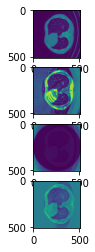

In [150]:
idx = 10

for i in tqdm(range(idx,idx+1)):
    label = labels[i,:]
    image_data, image_header = load(DD + str(int(label[0])) + ".mha")
    
    depth = image_data.shape[2]
    mid = int(depth/2)
    
    fig, axs = plt.subplots(4)
    
    axs[0].imshow(image_data[:,:,mid])
    
    maxs = np.max(image_data, axis=2)[:,:,np.newaxis]
    mins = np.min(image_data, axis=2)[:,:,np.newaxis]
    idv_norm_data = (image_data - mins)/(maxs - mins + 10**-100)
    axs[1].imshow(idv_norm_data[:,:,mid])
    
    super_norm_data = (image_data - super_mins)/(super_maxs-super_mins)
    axs[2].imshow(super_norm_data[:,:,mid])
    
    #new_mins = (np.ones((512, 512))*-1000)[:,:,np.newaxis]
    new_maxs = np.max(abs(image_data), axis=2)[:,:,np.newaxis]
    new_norm_data = (image_data - np.mean(image_data, axis=2)[:,:,np.newaxis])/new_maxs
    axs[3].imshow(new_norm_data[:,:,mid])

In [111]:
np.mean(super_mins)

-10.40283203125

In [151]:
import random

In [15]:
from scipy import stats

def get_truncated_normal(mean, sd, low, upp):
    return stats.truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

hw_amount = 90
d_amount = 60
tot_amount = (hw_amount**2) * d_amount


save_dir = f"slices/gaussian-grabber/size{tot_amount}-newnorm-uf/"
#d_labels = labels[:,:]
save_npy(d_labels, f"{save_dir}labels")

#all_data = np.zeros((labels.shape[0], tot_amount + 9))
all_data = []
dlabels = []


for l in tqdm(range(labels.shape[0])):
    label = labels[l,:]
    dlabels.append(label[1:])
    image_data, image_header = load(DD + str(int(label[0])) + ".mha")
    depth = image_data.shape[2]
    spacing = list(image_header.get_voxel_spacing())
    offset = list(image_header.get_offset())
    
    reader = sitk.ImageFileReader()
    reader.SetFileName(DD + str(int(label[0])) + ".mha")   # Give it the mha file as a string
    reader.LoadPrivateTagsOn()     # Make sure it can get all the info
    reader.ReadImageInformation()
    keys = reader.GetMetaDataKeys()
    
    ftrs = ["SliceThickness", "PatientSex", "PatientAge"]
    shouldPass = False
    for f in ftrs:
        if f not in keys:
            shouldPass = True
            break
    if shouldPass:
        print("bad sample")
        continue
    
    user_ftrs = spacing + offset + [float(reader.GetMetaData("SliceThickness")), reader.GetMetaData("PatientSex") == "M", np.log(float(reader.GetMetaData("PatientAge")))]
    #print(user_ftrs)
    
    #maxs = np.max(image_data, axis=2)[:,:,np.newaxis]
    #mins = np.min(image_data, axis=2)[:,:,np.newaxis]
    #norm_data = (image_data - mins)/(maxs - mins + 10**-100)
    abs_maxs = np.max(abs(image_data), axis=2)[:,:,np.newaxis]
    norm_data = (image_data - np.mean(image_data, axis=2)[:,:,np.newaxis])/abs_maxs
    
    HW = get_truncated_normal(mean=np.mean(np.arange(512)), sd=np.std(np.arange(512)), low=0, upp=511)
    hw = HW.rvs((2,hw_amount))
    for row in range(2):
        used = []
        for col in range(hw_amount):
            val = int(hw[row, col])
            while val in used:
                val = HW.rvs(1)
            hw[row, col] = val
            used.append(val)
    hw[0,:].sort()
    hw[1,:].sort()
            
    D = get_truncated_normal(mean=np.mean(np.arange(depth)), sd=np.std(np.arange(depth)), low=0, upp=depth-1)
    d = D.rvs(d_amount)
    used = []
    for col in range(d_amount):
        val = int(d[col])
        while val in used:
            val = D.rvs(1)
        d[col] = val
        used.append(val)
    d.sort()
    
    
    ct_slice = np.zeros((hw_amount, hw_amount, d_amount))
    for i, h_val in enumerate(hw[0,:]):
        for j, w_val in enumerate(hw[1,:]):
            for k, d_val in enumerate(d):
                ct_slice[i, j, k] = norm_data[int(h_val), int(w_val), int(d_val)]
    
    
    data_row = list(ct_slice.flatten()) + user_ftrs
    assert len(data_row) == tot_amount+9
    all_data.append(data_row)
    #print(all_data[l,:])
    
    #print(l)
    if l > 0 and l % 100 == 0:
        save_npy(all_data, f"{save_dir}batch{l}")


  0%|                                                 | 0/2000 [00:00<?, ?it/s]

[8.622e+03 1.000e+00 0.000e+00]


NameError: name 'load' is not defined

In [197]:
num_corrupted = 0

for row in range(labels.shape[0]):
    el = all_data[row,:]
    if np.all(el == 0):
        num_corrupted += 1
print(num_corrupted)

1804


In [163]:
save_npy(all_data, f"{save_dir}all")

In [70]:
np.std(np.arange(600))/3

57.7349467313695

In [69]:
np.mean(np.arange(600))

299.5

In [ ]:
from scipy import stats

def get_truncated_normal(mean=0, sd=1, low=0, upp=10):
    return stats.truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

tot_amount = 343000
hw_amount = 70
d_amount = 70

save_dir = f"slices/gaussian-grabber/size{tot_amount}/"
d_labels = labels[:,1:]
save_npy(d_labels, f"{save_dir}labels")

all_data = np.zeros((labels.shape[0], hw_amount, hw_amount, d_amount))

for l in tqdm(range(labels.shape[0])):
    label = labels[l,:]
    image_data, image_header = load(DD + str(int(label[0])) + ".mha")
    depth = image_data.shape[2]
    maxs = np.max(image_data, axis=2)[:,:,np.newaxis]
    mins = np.min(image_data, axis=2)[:,:,np.newaxis]
            
    norm_data = (image_data - mins)/(maxs - mins + 10**-100)

    
    
    ct_slice = np.zeros((hw_amount, hw_amount, d_amount))
    for i, h_val in enumerate(hw[0,:]):
        for j, w_val in enumerate(hw[1,:]):
            for k, d_val in enumerate(d):
                ct_slice[i, j, k] = norm_data[int(h_val), int(w_val), int(d_val)]
    
    
    all_data[l,:,:,:] = ct_slice
    
    #print(l)
    if l > 0 and l % 100 == 0:
        save_npy(all_data[0:l,:,:,:], f"{save_dir}batch{l}")

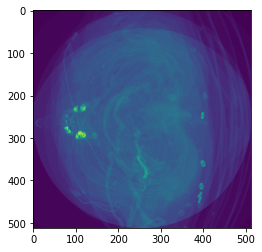

In [44]:
plt.imshow(maxs)

In [11]:
from PIL import Image
from matplotlib import cm

In [39]:
window_size = 3
avg_slice = np.zeros((window_size, 512, 512))


for i in tqdm(range(labels.shape[0])):
    label = labels[i,:]
    inputImage = sitk.ReadImage(DD + str(int(label[0])) + ".mha")
    
    d = inputImage.CopyInformation(srcImage=)
    print(d)
    pil_image = Image.frombytes(inputImage)
    plt.imshow(pil_image)
    
    for d in tqdm(range(inputImage.GetDepth())):
        if (d + window_size - 1) < inputImage.GetDepth():
            ct_slice = np.zeros((window_size,512,512))
            
            for w in range(window_size):
                for row in range(512):
                    if d+w < inputImage.GetDepth():
                        ct_slice[w,row,:] = [inputImage.GetPixel([row,col,d+w]) for col in range(512)]
                    else:
                        break
            
            #print(ct_slice)
            avg_slice += ct_slice
            #pil_image = Image.fromarray(ct_slice)
            #print(pil_image.size)
            save_npy(ct_slice, f"window-slices/{str(int(label[0]))}-{d}")
        else:
            break

  0%|                                                  | 0/2000 [00:00<?, ?it/s]


TypeError: CopyInformation() missing 1 required positional argument: 'srcImage'

In [13]:
# Central image

In [44]:
divisor = 4
h = int(512/divisor)
w = h

all_data = np.zeros((labels.shape[0], 3, h, w))

for l in tqdm(range(labels.shape[0])):
    label = labels[l,:]
    inputImage = sitk.ReadImage(DD + str(int(label[0])) + ".mha")
    
    depth = inputImage.GetDepth()
    
    d = int(depth/divisor)
    
    ct_slice = np.zeros((d, h, w))
    for i, d_val in enumerate(range(d, d*2)):
        for j, h_val in enumerate(range(h, h*2)):
            for k, w_val in enumerate(range(w, w*2)):
                ct_slice[i, j, k] = inputImage.GetPixel([h_val, w_val, d_val])
    
    
    output = np.zeros((3, h, w))
    output[0,:,:] = np.sum(ct_slice, axis=0)
    output[1,:,:] = np.mean(ct_slice, axis=0)
    #print(np.inf in output[1,:,:])
    #print(np.nan in output[1,:,:])
    output[2,:,:] = np.var(ct_slice, axis=0)
    #print(np.inf in output[2,:,:])
    #print(np.nan in output[2,:,:])
    
    all_data[l,:,:,:] = output
    
    if l > 0 and l % 100 == 0:
        save_npy(all_data[0:l+1,:,:,:], f"slices/1:{divisor}depth/single-slice-stats/batch{l}")
    #save_npy(output, f"slices/1:3depth/single-slice-stats/{str(int(label[0]))}")
    #save_npy(ct_slice, f"slices/1:3depth/{str(int(label[0]))}")

 79%|█████████████████████████████        | 1574/2000 [1:21:20<22:00,  3.10s/it]


KeyboardInterrupt: 

In [ ]:
# Gaussian Grabber

In [32]:
from scipy import stats

def get_truncated_normal(mean=0, sd=1, low=0, upp=10):
    return stats.truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

tot_amount = 343000
hw_amount = 70
d_amount = 70

save_dir = f"slices/gaussian-grabber/size{tot_amount}-hw{hw_amount}-d{d_amount}/"
d_labels = labels[:,1:]
save_npy(d_labels, f"{save_dir}labels")

all_data = np.zeros((labels.shape[0], tot_amount))

for l in tqdm(range(labels.shape[0])):
    label = labels[l,:]
    inputImage = sitk.ReadImage(DD + str(int(label[0])) + ".mha")
    
    depth = inputImage.GetDepth()
    
    #x = (tot_amount/(depth/(1024+depth)))**(1/3)
    #print(x)
    #y = tot_amount/(x**2)
    #print(y)
    #print(y*x**2)
    #amount_hw = math.floor(cube_val*512/(1024+depth))
    #amount_d = tot_amount - amount_hw*2
    #print(amount_hw)
    #print(depth)
    
    HW = get_truncated_normal(mean=np.mean(np.arange(512)), sd=np.std(np.arange(512)), low=0, upp=511)
    hw = HW.rvs((2,hw_amount))
    D = get_truncated_normal(mean=np.mean(np.arange(depth)), sd=np.std(np.arange(depth)), low=0, upp=depth-1)
    d = D.rvs(d_amount)
    
    ct_slice = np.zeros((hw_amount, hw_amount, d_amount))
    for i, h_val in enumerate(hw[0,:]):
        for j, w_val in enumerate(hw[1,:]):
            for k, d_val in enumerate(d):
                ct_slice[i, j, k] = inputImage.GetPixel([int(h_val), int(w_val), int(d_val)])
    
    all_data[l,:] = ct_slice.flatten()
    
    if l > 0 and l % 100 == 0:
        save_npy(all_data[0:l,:], f"{save_dir}batch{l}")
    #save_npy(output, f"slices/1:3depth/single-slice-stats/{str(int(label[0]))}")
    #save_npy(ct_slice, f"slices/1:3depth/{str(int(label[0]))}")
    

100%|███████████████████████████████████████| 2000/2000 [46:47<00:00,  1.40s/it]


In [33]:
mins = np.min(all_data, axis=0)
maxs = np.max(all_data, axis=0)
new_data = (all_data - mins)/(maxs-mins)

In [34]:
save_npy(new_data, f"{save_dir}/norm-all")

In [35]:
means = np.mean(all_data, axis=0)
stds = np.std(all_data, axis=0)
new_data = (all_data-means)/stds

In [36]:
save_npy(new_data, f"{save_dir}/std-all")

In [82]:
from scipy.stats import uniform, gamma, binom
import random
from scipy.stats import skewnorm

def binom_dist(n, p):
    return binom(n, p)

def skew_dist(skewness, num_vals, max_val):
    rand = skewnorm.rvs(a=skewness, size=num_vals)
    rand = rand - np.min(rand)
    rand = rand / np.max(rand)
    return rand*max_val

def gamma_dist(mu, var):
    alpha, beta = (mu**2)/var, var/mu
    return gamma(alpha, scale=1)

def uniform_dist(size):
    return uniform.rvs(size=size, loc=0, scale=1)

0.1463393479841767


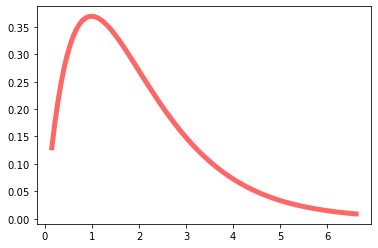

In [83]:
fig, ax = plt.subplots(1, 1)
a = 1.99
print(gamma.ppf(0.01, a))
x = np.linspace(gamma.ppf(0.01, a),
                gamma.ppf(0.99, a), 100)
ax.plot(x, gamma.pdf(x, a),
       'r-', lw=5, alpha=0.6, label='gamma pdf')

TypeError: Cannot cast scalar from dtype('float64') to dtype('int64') according to the rule 'safe'

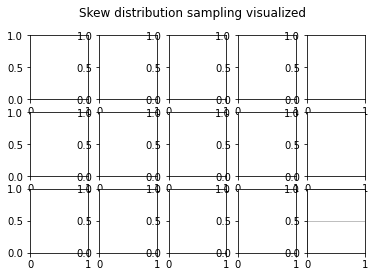

In [85]:
muz = np.arange(0,1,0.1)
varz =  np.arange(0,1,0.1)
sizes = [10, 50, 250]
alphas = [0.5, 0.3, 0.2]

fig, axs = plt.subplots(3,5)
plt.grid(True)

fig.suptitle("Skew distribution sampling visualized")

for i, m in enumerate(muz):
    for j, v in enumerate(varz):
        sd = binom_dist(0.1, 0.1)
        axs[j,i].scatter(np.arange(250), sd.rvs(250))
        axs[j,i].set_xticks([])
        axs[j,i].set_yticks([])
        if j == 2:
            axs[j,i].set_xlabel(f"Skew: {s}")
            
        if i == 0:
            axs[j,i].set_ylabel(f"{sz} samples")

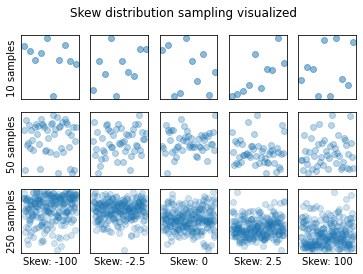

In [69]:
skewness = [-100, -2.5, 0, 2.5, 100]
sizes = [10, 50, 250]
alphas = [0.5, 0.3, 0.2]
h = skew_dist(-2, 1000, 511)

fig, axs = plt.subplots(3,5)
plt.grid(True)

fig.suptitle("Skew distribution sampling visualized")

for i, s in enumerate(skewness):
    for j, sz in enumerate(sizes):
        sd = skew_dist(s, sz, 1)
        axs[j,i].scatter(np.arange(sz), sd, alpha=alphas[j])
        axs[j,i].set_xticks([])
        axs[j,i].set_yticks([])
        if j == 2:
            axs[j,i].set_xlabel(f"Skew: {s}")
            
        if i == 0:
            axs[j,i].set_ylabel(f"{sz} samples")

  0%|                                        | 3/2000 [00:10<1:56:30,  3.50s/it]


KeyboardInterrupt: 

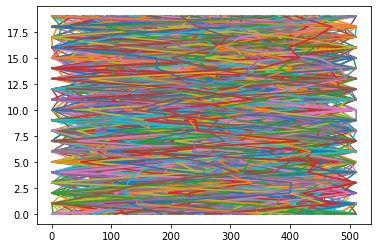

In [11]:
p = 0.04
amount = math.floor(p*512)

#means = get_truncated_normal(mean=np.mean(np.arange(0,1,0.001)), sd=np.std(np.arange(0,1,0.001)), low=0, upp=1)
#means = uniform.rvs(size=n, loc = start, scale=width)
#mus = means.rvs(10)
#print(mus)
skewness = [-5,-2,0,2,5]

all_data = np.zeros((labels.shape[0]*len(skewness)**3, amount**3))
d_labels = np.zeros((labels.shape[0]*len(skewness)**3, 5))

idx = 0
for l in tqdm(range(labels.shape[0])):
    label = labels[l,:]
    inputImage = sitk.ReadImage(DD + str(int(label[0])) + ".mha")
    depth = inputImage.GetDepth()
    #hw_x = np.arange(512)
    #d_x = np.arange(depth)
    
    for h_s in skewness:
        for w_s in skewness:
            for d_s in skewness:
                d_labels[idx,:] = np.array([labels[l,1], labels[l,2], h_s, w_s, d_s])
                #print(d_labels[l+idx,2:])
                #mu_h = math.floor(h_mu*511)
                #var_h = math.floor(h_var*511)
                #mu_w = math.floor(w_mu*511)
                #var_w = math.floor(w_var*511)
                #mu_d = math.floor(d_mu*depth-1)
                #var_d = math.floor(d_var*depth-1)
                #print([mu_h, mu_w, mu_d])
                #print([var_h, var_w, var_d])
                #h = gamma_dist(mu_h, var_h)
                #w = gamma_dist(mu_w, var_w)
                #d = gamma_dist(mu_d, var_d)
                #print(h.rvs(10))
                #print(w.rvs(10))
                #print(d.rvs(10))
                h = skew_dist(h_s, amount, 511)
                w = skew_dist(w_s, amount, 511)
                d = skew_dist(d_s, amount, depth-1)
                #print(h)
                #print(depth)
                plt.plot(h,np.arange(amount))

                ct_slice = np.zeros((amount, amount, amount))
                for i, h_val in enumerate(h):
                    for j, w_val in enumerate(w):
                        for k, d_val in enumerate(d):
                            #print([int(h_val), int(w_val), int(d_val)])
                            ct_slice[i, j, k] = inputImage.GetPixel([int(h_val), int(w_val), int(d_val)])

                all_data[idx,:] = ct_slice.flatten()
                idx += 1

                if idx > 0 and idx % 25000 == 0:
                    save_npy(all_data[0:l,:], f"slices/gamma-grabber/p{p}/batch{idx}")
                    save_npy(d_labels[0:l,:], f"slices/gamma-grabber/p{p}/batch{idx}-labels")

In [154]:
save_npy(all_data, f"slices/gamma-grabber/p{p}/all")
save_npy(d_labels, f"slices/gamma-grabber/p{p}/all-y")

In [30]:
all_data.shape

(2000, 4, 128, 128)

In [32]:
all_data[0,0,:,:]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [54]:
np.arange(0,10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])